In [50]:
from IPython.display import display_png
from networkx import draw_kamada_kawai
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import CouplingMap
from ag import *

In [51]:
'''Display architecture graphs'''
def display_ag(ag) -> None:
    draw_kamada_kawai(ag)

'''Display quantum circuits'''
def display_qc(qasm_file, t="DAG") -> QuantumCircuit:
    circuit = QuantumCircuit.from_qasm_file(qasm_file)
    if t == "DAG":
        dag = circuit_to_dag(circuit)
        display_png(dag.draw())
    elif t == "circuit":
        display(circuit.draw())
    else:
        raise ValueError("argument `t` must be either 'DAG' or 'circuit'")
    return circuit

## Architecture graphs

The following quantum devices were used throughout the paper:
1. Ourense (5 qubits)
2. Tokyo (20 qubits)
3. Rochester (53 qubits)
4. Sycamore53 (53 qubits)
5. Sycamore54 (54 qubits)

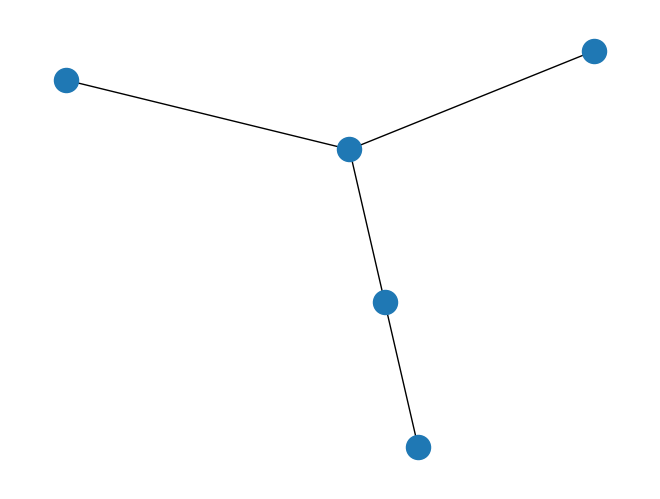

In [52]:
display_ag(ourense())

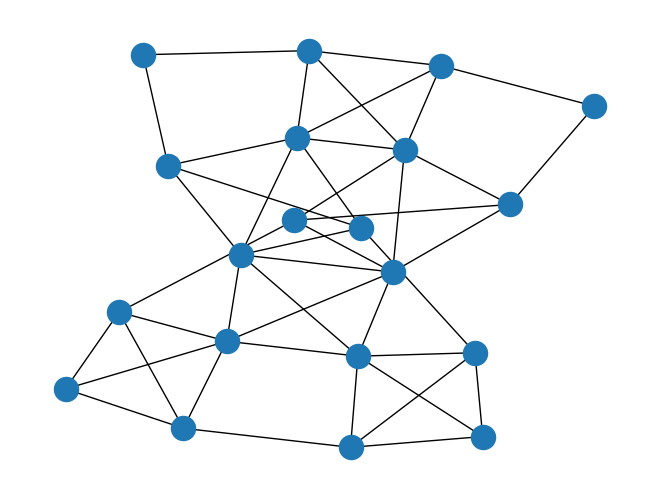

In [80]:
# NOTE: The layout of Tokyo is slightly convoluted
display_ag(tokyo())

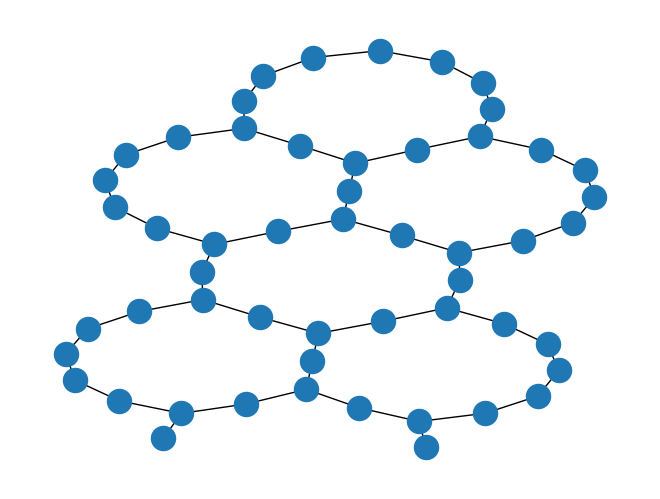

In [54]:
display_ag(rochester())

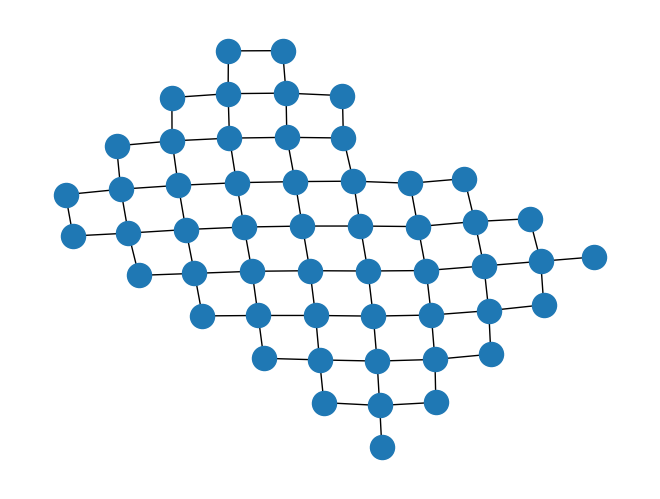

In [55]:
display_ag(sycamore53())

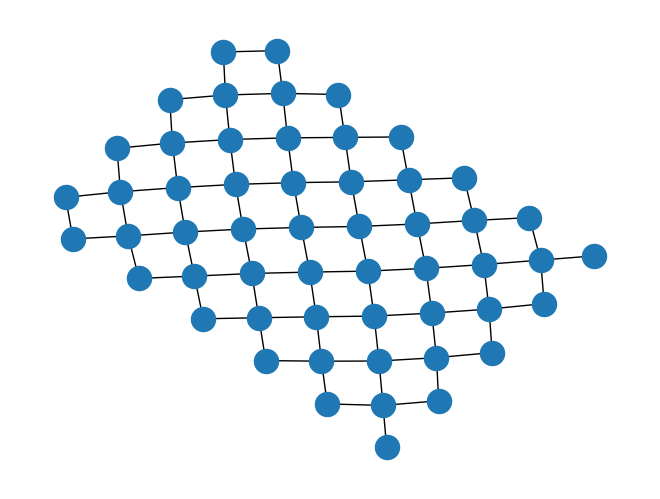

In [56]:
display_ag(sycamore54())

## Verify `example_4q`

Refer to $\text{Fig. 1}$ in the paper.

1. A logical circuit $C$ with qubits $P := \{p_0, p_1, p_2, p_3\}$. We attempt to transform $C$ such that it is executable on IBM Q Ourense, with qubits $V := \{v_0, v_1, v_2, v_3, v_4\}$.
2. An initial mapping $\pi: P \to V$, under which we have $p_0 \mapsto v_1, p_1 \mapsto v_0, p_2 \mapsto v_2, p_3 \mapsto v_3$.
3. A SABRE transformation (using Qiskit 0.39.4 SabreSwap).
4. A SQGM transformation.

Note that the circuits displayed in (2-4) represent the target backend with the logical circuit *embedded* onto it under $\pi$, i.e., $\texttt{q\_i} = v_i, 0 \leq i \leq 4$.

As expected, SQGM reduces the transformation depth from SABRE's $15$ to $11$.

In [81]:
qc1 = display_qc("benchmark/example_4q/example_4q.qasm", t="circuit")
print(f"DEPTH: {qc1.depth()}")

┌───┐     ┌───┐┌───┐┌───┐┌───┐     
q_0: ──■──┤ Z ├──■──┤ Y ├┤ Y ├┤ Y ├┤ Y ├─────
     ┌─┴─┐└───┘  │  └───┘├───┤├───┤├───┤┌───┐
q_1: ┤ X ├──■────┼────■──┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘  │    │  ┌─┴─┐└───┘└───┘└───┘└───┘
q_2: ───────┼────┼──┤ X ├────────────────────
          ┌─┴─┐┌─┴─┐└───┘                    
q_3: ─────┤ X ├┤ X ├─────────────────────────
          └───┘└───┘

DEPTH: 7


In [84]:
qc2 = display_qc("benchmark/example_4q/example_4q-init.qasm", t="circuit")
print(f"DEPTH: {qc2.depth()}")

┌───┐               ┌───┐┌───┐┌───┐┌───┐     
q_0: ┤ X ├───────■────■──┤ X ├┤ X ├┤ X ├┤ X ├─────
     └─┬─┘┌───┐  │    │  └───┘├───┤├───┤├───┤┌───┐
q_1: ──■──┤ Z ├──┼────┼────■──┤ Y ├┤ Y ├┤ Y ├┤ Y ├
          └───┘  │  ┌─┴─┐  │  └───┘└───┘└───┘└───┘
q_2: ────────────┼──┤ X ├──┼──────────────────────
               ┌─┴─┐└───┘┌─┴─┐                    
q_3: ──────────┤ X ├─────┤ X ├────────────────────
               └───┘     └───┘                    
q_4: ─────────────────────────────────────────────

DEPTH: 7


In [82]:
qc3 = display_qc("sqgm_data/example_4q/example_4q-sabre0394-depth_min-out.qasm", t="circuit")
print(f"DEPTH: {qc3.depth()}")

┌───┐               ┌───┐┌───┐┌───┐┌───┐     ┌───┐          ┌───┐┌───┐»
q_0: ┤ X ├───────■────■──┤ X ├┤ X ├┤ X ├┤ X ├──■──┤ X ├──■────■──┤ Y ├┤ Y ├»
     └─┬─┘┌───┐  │    │  └───┘└───┘└───┘└───┘┌─┴─┐└─┬─┘┌─┴─┐  │  └───┘└───┘»
q_1: ──■──┤ Z ├──┼────┼──────────────────────┤ X ├──■──┤ X ├──┼────────────»
          └───┘  │  ┌─┴─┐                    └───┘     └───┘  │            »
q_2: ────────────┼──┤ X ├─────────────────────────────────────┼────────────»
               ┌─┴─┐└───┘                                   ┌─┴─┐          »
q_3: ──────────┤ X ├────────────────────────────────────────┤ X ├──────────»
               └───┘                                        └───┘          »
q_4: ──────────────────────────────────────────────────────────────────────»
                                                                           »
«     ┌───┐┌───┐
«q_0: ┤ Y ├┤ Y ├
«     └───┘└───┘
«q_1: ──────────
«               
«q_2: ──────────
«               
«q_3: ──────────
«               
«q_4: ──────────
«

DEPTH: 15


In [83]:
qc4 = display_qc("sqgm_data/example_4q/example_4q-sqgm-depth_min-out.qasm", t="circuit")
print(f"DEPTH: {qc4.depth()}")

┌───┐                    ┌───┐          ┌───┐┌───┐┌───┐┌───┐
q_0: ┤ X ├───────■────■────■──┤ X ├──■────■──┤ Y ├┤ Y ├┤ Y ├┤ Y ├
     └─┬─┘┌───┐  │    │  ┌─┴─┐└─┬─┘┌─┴─┐  │  ├───┤├───┤├───┤├───┤
q_1: ──■──┤ Z ├──┼────┼──┤ X ├──■──┤ X ├──┼──┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘  │  ┌─┴─┐└───┘     └───┘  │  └───┘└───┘└───┘└───┘
q_2: ────────────┼──┤ X ├─────────────────┼──────────────────────
               ┌─┴─┐└───┘               ┌─┴─┐                    
q_3: ──────────┤ X ├────────────────────┤ X ├────────────────────
               └───┘                    └───┘                    
q_4: ────────────────────────────────────────────────────────────

DEPTH: 11
